# Análisis de retención de clientes mediante técnicas de aprendizaje automático - Modelo 2 
Lucia Canales Fischer

In [1]:
#!pip install pyodbc
#!pip install pandas 
#!pip install xgboost
#!pip install pandas openpyxl


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyodbc

In [2]:
ruta = "C:\\Users\\lucia\\Downloads\\tesis\\modelo_2_oct4.xlsx"
devoluciones = pd.read_excel(ruta)

In [3]:
devoluciones['fechaingreso'] = pd.to_datetime(devoluciones['fechaingreso'])
devoluciones['mes_entrega_tarjeta'] = devoluciones['fechaingreso'].dt.month

In [4]:
devoluciones['fecha'] = pd.to_datetime(devoluciones['AñoMesIngreso'], format='%Y%m')
devoluciones['año'] = devoluciones['fecha'].dt.year
devoluciones['mes'] = devoluciones['fecha'].dt.month
devoluciones['log_ingresos'] = np.log(devoluciones['ingresos'])

# ONE HOT ENCODING

In [7]:
devoluciones_encoded = pd.get_dummies(devoluciones, columns=['Canal_ingreso','sexo', 'estado_civil','departamento'
                                                             ,'mes_entrega_tarjeta','hizo_pagos','pago_atraso','HizoCompra', 'HizoCompraNormal'])
devoluciones_encoded = devoluciones_encoded.drop(columns='codigo_cliente')

# Definición de TRAIN y TEST

In [11]:
from sklearn.model_selection import train_test_split

X = devoluciones_encoded.drop(columns=['devuelta'])  
y = devoluciones_encoded['devuelta']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
eliminar_full = ['fechaingreso', 'AñoMesIngreso','fecha_nacimiento', 'tipo_trabajo', 'ingresos',
 'FechaModificacion', 'AñoMesModificacion', 'UltimoEstado', 'dif_meses',
  'FechaPrimeraCompra', 'FechaUltimaCompra', 'prop_pagos_atraso',
 'FechaPrimeraCompraNormal', 'FechaUltimaCompraNormal', 'fecha', 'año', 'mes'] 

In [13]:
X_train_full = X_train.drop(columns=eliminar_full)
X_test_full = X_test.drop(columns=eliminar_full)

# LOGISTICA 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

logit_model = LogisticRegression()

logit_model.fit(X_train_full, y_train)

y_pred_log = logit_model.predict(X_test_full)

accuracy = accuracy_score(y_test, y_pred_log)

Accuracy: 0.956955463042966


C:\Users\lucia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import numpy as np

X_train_full = sm.add_constant(X_train_full)
X_test_full = sm.add_constant(X_test_full)

logit_model = sm.Logit(y_train, X_train_full)
result = logit_model.fit()

y_pred_log_prob = result.predict(X_test_full)
y_pred_log = np.where(y_pred_log_prob > 0.5, 1, 0) 

accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

print(result.summary())


C:\Users\lucia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.156648
         Iterations 10
Accuracy: 0.956955463042966
                           Logit Regression Results                           
Dep. Variable:               devuelta   No. Observations:                29703
Model:                          Logit   Df Residuals:                    29645
Method:                           MLE   Df Model:                           57
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                 0.07832
Time:                        18:53:10   Log-Likelihood:                -4652.9
converged:                       True   LL-Null:                       -5048.3
Covariance Type:            nonrobust   LLR p-value:                9.528e-130
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.8928   1.19

C:\Users\lucia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


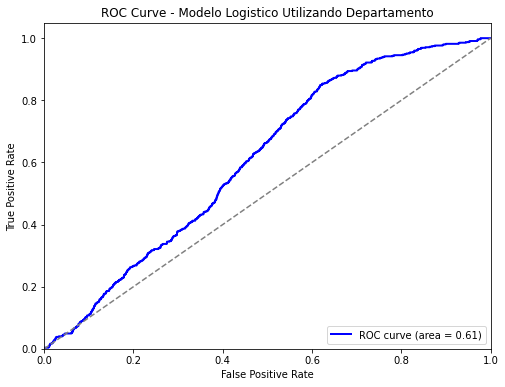

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


logit_model = LogisticRegression()
logit_model.fit(X_train_full, y_train)

y_pred_log = logit_model.predict(X_test_full)
y_prob_log = logit_model.predict_proba(X_test_full)[:, 1]

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_prob_log)
auc_log = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_log)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Modelo Logistico Utilizando Departamento')
plt.legend(loc='lower right')
plt.show()

In [18]:
y_prob_log = logit_model.predict_proba(X_test_full)[:, 1]
y_pred_log = (y_prob_log > 0.5).astype(int)

result_log = pd.DataFrame({'y_prob': y_prob_log, 'y_pred': y_pred_log}, index=X_test_full.index)
result_log

,y_prob,y_pred
28168,0.024388,0
3277,0.041456,0
12950,0.110436,0
8363,0.101378,0
16286,0.080387,0
...,...,...
20398,0.072353,0
36257,0.000068,0
7924,0.092467,0
11342,0.110280,0


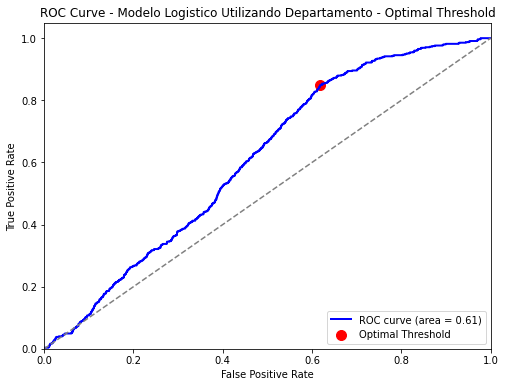

Optimal Threshold: 0.03501387828700462


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_log = logit_model.predict_proba(X_test_full)[:, 1]

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_prob_log)

auc_log = roc_auc_score(y_test, y_prob_log)

Youden_index_log = tpr_log - fpr_log
optimal_threshold_index_log = np.argmax(Youden_index_log)
optimal_threshold_log = thresholds_log[optimal_threshold_index_log]

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_log)
plt.scatter(fpr_log[optimal_threshold_index_log]
            , tpr_log[optimal_threshold_index_log]
            , color='red', s=100, label='Optimal Threshold')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Modelo Logistico Utilizando Departamento - Optimal Threshold')
plt.legend(loc='lower right')
plt.show()

print("Optimal Threshold:", optimal_threshold_log)

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_optimal_threshold_log = (y_prob_log >= optimal_threshold_log).astype(int)

conf_matrix_log = confusion_matrix(y_test, y_pred_optimal_threshold_log)

print("Matriz de confusión:")
print(conf_matrix_log)

Matriz de confusión:
[[4657 7526]
 [  83  465]]


In [21]:
fn_index_row = 1  
fn_index_col = 0 
fn_count = conf_matrix_log[fn_index_row, fn_index_col]

print("Falsos Negativos (FN):", fn_count)

Falsos Negativos (FN): 83


In [22]:
y_prob_log = logit_model.predict_proba(X_test_full)[:, 1]
y_pred_log = (y_prob_log > 0.5).astype(int)
y_pred_optimal_threshold_log = (y_prob_log >= optimal_threshold_log).astype(int)

result_log = pd.DataFrame({'y_prob': y_prob_log,
                              'y_pred': y_pred_log,
                             'y_pred_OT' : y_pred_optimal_threshold_log
                             }, index=X_test_full.index)
result_log

,y_prob,y_pred,y_pred_OT
28168,0.024388,0,0
3277,0.041456,0,1
12950,0.110436,0,1
8363,0.101378,0,1
16286,0.080387,0,1
...,...,...,...
20398,0.072353,0,1
36257,0.000068,0,0
7924,0.092467,0,1
11342,0.110280,0,1


In [24]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc(y_real_log, y_proba_log):
    df = pd.DataFrame()
    df['real'] = y_real_log
    df['proba'] = y_proba_log
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'], df['proba'])
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

print("Log model:")
ks_base_log, auc_base_log = evaluate_ks_and_roc_auc(y_test, y_prob_log)

Log model:
KS: 0.2308 (p-value: 5.067e-25)
ROC AUC: 0.6088


In [25]:
results_df_log = pd.DataFrame({
    'Modelo': ['Logistico'],
    'KS': [ks_base_log],
    'ROC AUC': [auc_base_log]
})
results_df_log = results_df_log.round(3)
results_df_log

,Modelo,KS,ROC AUC
0,Logistico,0.231,0.609


# Random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier()

rf_model.fit(X_train_full, y_train)

y_pred_rf = rf_model.predict(X_test_full)

accuracy = accuracy_score(y_test, y_pred_rf)

Accuracy: 0.9567198177676538


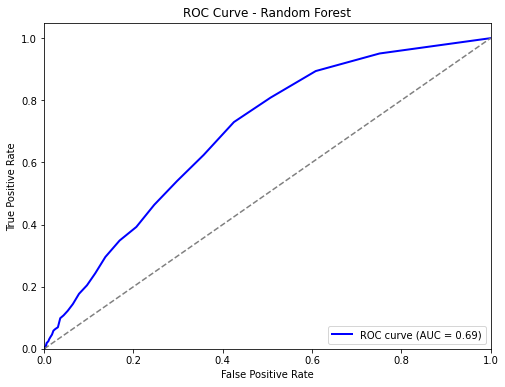

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_rf = rf_model.predict_proba(X_test_full)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

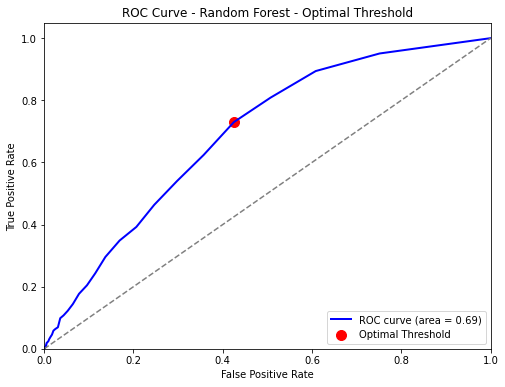

Optimal Threshold: 0.04


In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_rf = rf_model.predict_proba(X_test_full)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

auc_rf = roc_auc_score(y_test, y_prob_rf)

Youden_index_rf = tpr_rf - fpr_rf
optimal_threshold_index_rf = np.argmax(Youden_index_rf)
optimal_threshold_rf = thresholds_rf[optimal_threshold_index_rf]

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_rf)
plt.scatter(fpr_rf[optimal_threshold_index_rf], tpr_rf[optimal_threshold_index_rf], color='red', s=100
            , label='Optimal Threshold')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest - Optimal Threshold')
plt.legend(loc='lower right')
plt.show()

print("Optimal Threshold:", optimal_threshold_rf)

In [29]:
from sklearn.metrics import confusion_matrix

y_prob_rf = rf_model.predict_proba(X_test_full)[:, 1]

y_pred_optimal_rf = (y_prob_rf >= optimal_threshold_rf).astype(int)

conf_matrix_rf = confusion_matrix(y_test, y_pred_optimal_rf)

print("Matriz de Confusión:")
print(conf_matrix_rf)

Matriz de Confusión:
[[7005 5178]
 [ 148  400]]


In [30]:
y_prob_rf = rf_model.predict_proba(X_test_full)[:, 1]
y_pred_rf = rf_model.predict(X_test_full)
y_pred_optimal_rf = (y_prob_rf >= optimal_threshold_rf).astype(int)


result_df = pd.DataFrame({'y_prob': y_prob_rf, 'y_pred': y_pred_rf, 'y_pred_OT':y_pred_optimal_rf }, index=X_test_full.index)
result_df

,y_prob,y_pred,y_pred_OT
28168,0.00,0,0
3277,0.03,0,0
12950,0.21,0,1
8363,0.05,0,1
16286,0.07,0,1
...,...,...,...
20398,0.00,0,0
36257,0.00,0,0
7924,0.07,0,1
11342,0.04,0,1


In [32]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc(y_real_rf, y_proba_rf):
    df = pd.DataFrame()
    df['real'] = y_real_rf
    df['proba'] = y_proba_rf
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'], df['proba'])
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

print("RF model:")
ks_rf, auc_rf = evaluate_ks_and_roc_auc(y_test, y_prob_rf)

RF model:
KS: 0.3049 (p-value: 9.874e-44)
ROC AUC: 0.6922


In [33]:
results_df_rf = pd.DataFrame({
    'Modelo': ['Random Forest'],
    'KS': [ks_rf],
    'ROC AUC': [auc_rf]
})


results_resumen = pd.concat([results_df_log, results_df_rf], ignore_index=True)
results_resumen = results_resumen.round(3)
results_resumen

,Modelo,KS,ROC AUC
0,Logistico,0.231,0.609
1,Random Forest,0.305,0.692


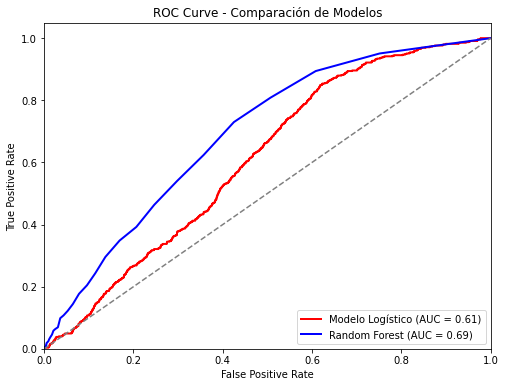

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC - Modelo Logístico 
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='red', lw=2, label='Modelo Logístico (AUC = %0.2f)' % auc_log)

# Curva ROC - Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Comparación de Modelos')
plt.legend(loc='lower right')
plt.show()


# XG BOOST

In [35]:
#pip install xgboost

In [36]:
import xgboost as xgb
from sklearn.metrics import classification_report

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train_full, y_train)

y_pred_xgb = xgb_model.predict(X_test_full)

accuracy = accuracy_score(y_test, y_pred_xgb)

Accuracy: 0.9563270756421334


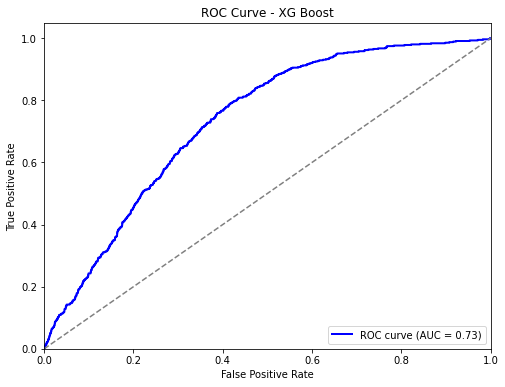

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_xgb = xgb_model.predict_proba(X_test_full)[:, 1]

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

auc_xgb = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_xgb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XG Boost')
plt.legend(loc='lower right')
plt.show()

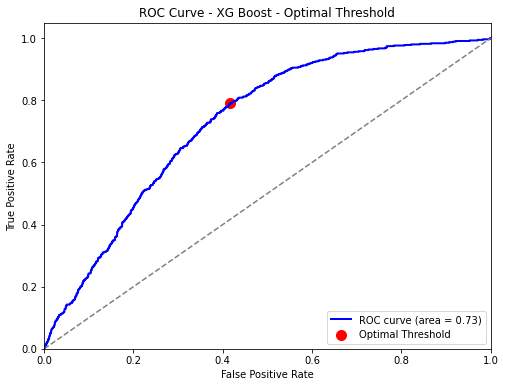

Optimal Threshold: 0.020329366


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_xgb = xgb_model.predict_proba(X_test_full)[:, 1]

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)

auc_xgb = roc_auc_score(y_test, y_prob_xgb)

Youden_index_xgb = tpr_xgb - fpr_xgb
optimal_threshold_index_xgb = np.argmax(Youden_index_xgb)
optimal_threshold_xgb = thresholds_xgb[optimal_threshold_index_xgb]

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_xgb)
plt.scatter(fpr_xgb[optimal_threshold_index_xgb], tpr_xgb[optimal_threshold_index_xgb], color='red', s=100, label='Optimal Threshold')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XG Boost - Optimal Threshold')
plt.legend(loc='lower right')
plt.show()

print("Optimal Threshold:", optimal_threshold_xgb)

In [39]:
from sklearn.metrics import confusion_matrix

y_prob_xgb = xgb_model.predict_proba(X_test_full)[:, 1]

y_pred_optimal_xgb = (y_prob_xgb >= optimal_threshold_xgb).astype(int)

conf_matrix_xgb = confusion_matrix(y_test, y_pred_optimal_xgb)

print("Matriz de Confusión:")
print(conf_matrix_xgb)

Matriz de Confusión:
[[7107 5076]
 [ 115  433]]


In [40]:
y_prob_xgb = xgb_model.predict_proba(X_test_full)[:, 1]
y_pred_xgb = xgb_model.predict(X_test_full)
y_pred_optimal_xgb = (y_prob_xgb >= optimal_threshold_xgb).astype(int)


result_df = pd.DataFrame({'y_prob': y_prob_xgb, 'y_pred': y_pred_xgb, 'y_pred_OT':y_pred_optimal_xgb }, index=X_test_full.index)
result_df

,y_prob,y_pred,y_pred_OT
28168,0.006453,0,0
3277,0.027566,0,1
12950,0.119794,0,1
8363,0.033708,0,1
16286,0.195774,0,1
...,...,...,...
20398,0.000211,0,0
36257,0.000432,0,0
7924,0.019865,0,0
11342,0.025281,0,1


In [42]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc(y_real_xgb, y_proba_xgb):
    df = pd.DataFrame()
    df['real'] = y_real_xgb
    df['proba'] = y_proba_xgb
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'], df['proba'])
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

print("xgb model:")
ks_xgb, auc_xgb = evaluate_ks_and_roc_auc(y_test, y_prob_xgb)

xgb model:
KS: 0.3735 (p-value: 3.921e-66)
ROC AUC: 0.7314


In [43]:
results_df_xgb = pd.DataFrame({
    'Modelo': ['XGBoost'],
    'KS': [ks_xgb],
    'ROC AUC': [auc_xgb]
})

results_resumen = pd.concat([results_df_log, results_df_rf,results_df_xgb ], ignore_index=True)
results_resumen = results_resumen.round(3)
results_resumen

,Modelo,KS,ROC AUC
0,Logistico,0.231,0.609
1,Random Forest,0.305,0.692
2,XGBoost,0.373,0.731


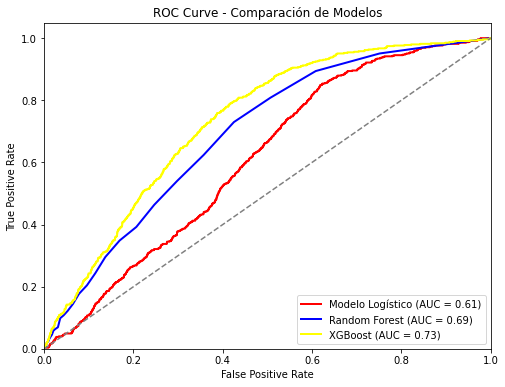

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC - Modelo Logístico
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='red', lw=2, label='Modelo Logístico (AUC = %0.2f)' % auc_log)

# Curva ROC - Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)

#Curva ROC - XGBoost
plt.plot(fpr_xgb, tpr_xgb, color='yellow', lw=2, label='XGBoost (AUC = %0.2f)' % auc_xgb)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Comparación de Modelos')
plt.legend(loc='lower right')
plt.show()

# LOGISTICA con STEPWISE 

In [45]:
X_train_full = X_train_full.drop(columns='const')
X_test_full = X_test_full.drop(columns='const')

In [47]:
#pip install mlxtend

In [46]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

logit_model_SW = LogisticRegression(max_iter=1000)

sfs = SFS(logit_model_SW, 
          k_features='best', 
          forward=True, 
          floating=False, 
          verbose=2,
          scoring='roc_auc',
          cv=5)

sfs = sfs.fit(X_train_scaled, y_train)

selected_features = list(sfs.k_feature_names_)
print("Características seleccionadas:", selected_features)

logit_model_SFS = LogisticRegression(max_iter=1000).fit(X_train_scaled[:, sfs.k_feature_idx_], y_train)
print("Coeficientes del modelo final:", logit_model_SFS.coef_)

y_pred_logitSFS = logit_model_SFS.predict(X_test_scaled[:, sfs.k_feature_idx_])

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    9.3s

[2024-11-10 19:05:21] Features: 1/66 -- score: 0.6644199803480799[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   12.2s

[2024-11-10 19:05:40] Features: 2/66 -- score: 0.6795904892923421[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   17.0s

[2024-11-10 19:06:07] Features: 3/66 -- score: 0.6909918970715416[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   17.0s

[2024-11-10 19:06:34] Features: 4/66 -- score: 0.7035054036997923[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   18.5s

[2024-11-10 19:07:02] Features: 5/66 -- score: 0.7063114417053754[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   17.8s

[2024-11-10 19:07:30] Features: 6/66 -- score: 0.7081948514444621[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   19.5s

[2024-11-10 19:08:00] Features: 7/66 -- score: 0.7096919007679248[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   20.5s

[2024-11-10 19:08:29] Features: 8/66 -- score: 0.

Características seleccionadas: ['0', '1', '2', '3', '4', '5', '6', '8', '9', '10', '12', '15', '16', '17', '18', '19', '20', '27', '31', '34', '38', '39', '43', '44', '45', '46', '48', '56', '57', '58', '59', '62', '64']
Coeficientes del modelo final: [[ 0.21344725 -0.06381397 -0.34652502  0.17451236 -0.67341178  0.74605657
   0.76163571 -0.35406658  0.30707558 -0.12317613 -0.8947597   0.07853858
   0.01749181 -0.00092565 -0.04552389  0.04087024 -0.04087024 -0.09453509
  -0.01597293  0.02995189 -0.08421641 -0.1580988  -0.03238954 -0.04404704
  -0.07734688 -0.12233348  0.06801158  0.05975664  0.15420764 -0.06732984
   0.06732984  0.32104695 -0.17712272]]


In [48]:
feature_names = X_train_full.columns

selected_coefs = logit_model_SFS.coef_[0]
selected_indices = [int(index) for index in selected_features]
selected_coef_df = pd.DataFrame({'Variable': feature_names[selected_indices], 'Coeficiente': selected_coefs})
selected_coef_df

,Variable,Coeficiente
0,edad_solicitud,0.213447
1,LimiteCredito,-0.063814
2,recencia,-0.346525
3,frecuencia,0.174512
4,monetario,-0.673412
5,recencia_CompraNormal,0.746057
6,frecuencia_CompraNormal,0.761636
7,Cant_Trx_Mes,-0.354067
8,Monto_Trx_Promedio,0.307076
9,Monto_Trx_Mes,-0.123176


In [49]:
selected_features_names = [feature_names[index] for index in selected_indices]

print("Variables seleccionadas:", selected_features_names)

Variables seleccionadas: ['edad_solicitud', 'LimiteCredito', 'recencia', 'frecuencia', 'monetario', 'recencia_CompraNormal', 'frecuencia_CompraNormal', 'Cant_Trx_Mes', 'Monto_Trx_Promedio', 'Monto_Trx_Mes', 'Cant_Trx_Normal_Mes', 'log_ingresos', 'Canal_ingreso_Call Center', 'Canal_ingreso_Red', 'Canal_ingreso_Venta Digital', 'sexo_F', 'sexo_M', 'departamento_Artigas', 'departamento_Durazno', 'departamento_Lavalleja', 'departamento_Rivera', 'departamento_Rocha', 'departamento_Soriano', 'departamento_Tacuarembó', 'departamento_Treinta y Tres', 'mes_entrega_tarjeta_1', 'mes_entrega_tarjeta_3', 'mes_entrega_tarjeta_11', 'mes_entrega_tarjeta_12', 'hizo_pagos_0', 'hizo_pagos_1', 'HizoCompra_0', 'HizoCompraNormal_0']


In [50]:
# me quedo con edad, recencia, frecuencia, monetario, cantidad , monto, ingresos - el criterio es coeficiente mayor a 0.1

# MODELOS REDUCIDOS

In [51]:
eliminar_reducido = ['fechaingreso', 'AñoMesIngreso','fecha_nacimiento', 'tipo_trabajo', 'ingresos',
 'FechaModificacion', 'AñoMesModificacion', 'UltimoEstado', 'dif_meses',
  'FechaPrimeraCompra', 'FechaUltimaCompra', 'prop_pagos_atraso',
 'FechaPrimeraCompraNormal', 'FechaUltimaCompraNormal', 'fecha', 'año', 'mes', 
 'Canal_ingreso_Call Center', 'Canal_ingreso_Red', 'Canal_ingreso_Venta Digital', 'sexo_F', 'sexo_M',
 'estado_civil_Casado', 'estado_civil_Divorciado', 'estado_civil_Separado', 'estado_civil_Soltero', 'estado_civil_Unión Libre',
 'estado_civil_Viudo', 'departamento_Artigas', 'departamento_Canelones', 'departamento_Cerro Largo', 'departamento_Colonia',
 'departamento_Durazno', 'departamento_Flores', 'departamento_Florida', 'departamento_Lavalleja', 'departamento_Maldonado',
 'departamento_Montevideo', 'departamento_Paysandú', 'departamento_Rivera', 'departamento_Rocha', 'departamento_Río Negro',
 'departamento_Salto', 'departamento_San José', 'departamento_Soriano', 'departamento_Tacuarembó', 'departamento_Treinta y Tres',
 'mes_entrega_tarjeta_1', 'mes_entrega_tarjeta_2', 'mes_entrega_tarjeta_3', 'mes_entrega_tarjeta_4', 'mes_entrega_tarjeta_5',
 'mes_entrega_tarjeta_6', 'mes_entrega_tarjeta_7', 'mes_entrega_tarjeta_8', 'mes_entrega_tarjeta_9', 'mes_entrega_tarjeta_10',
 'mes_entrega_tarjeta_11', 'mes_entrega_tarjeta_12', 'hizo_pagos_0', 'hizo_pagos_1', 'pago_atraso_0', 'pago_atraso_1',
 'HizoCompra_0', 'HizoCompra_1', 'HizoCompraNormal_0', 'HizoCompraNormal_1']

In [52]:
X_train_reducido = X_train.drop(columns=eliminar_reducido)
X_test_reducido = X_test.drop(columns=eliminar_reducido)

# Logistica

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

logit_model_red = LogisticRegression(max_iter=1000) #max_iter=1000, C=1.0

logit_model_red.fit(X_train_reducido, y_train)

y_pred_log_red = logit_model_red.predict(X_test_reducido)

accuracy_red = accuracy_score(y_test, y_pred_log_red)

Accuracy: 0.956955463042966


C:\Users\lucia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import numpy as np

X_train_reducido = sm.add_constant(X_train_reducido)
X_test_reducido = sm.add_constant(X_test_reducido)

logit_model_red = sm.Logit(y_train, X_train_reducido)
result_red = logit_model_red.fit()

y_pred_log_prob_red = result_red.predict(X_test_reducido)
y_pred_log_red = np.where(y_pred_log_prob_red > 0.5, 1, 0) 

accuracy = accuracy_score(y_test, y_pred_log_red)
print("Accuracy:", accuracy)

print(result_red.summary())


Optimization terminated successfully.
         Current function value: 0.158724
         Iterations 10
Accuracy: 0.956955463042966
                           Logit Regression Results                           
Dep. Variable:               devuelta   No. Observations:                29703
Model:                          Logit   Df Residuals:                    29686
Method:                           MLE   Df Model:                           16
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                 0.06610
Time:                        20:03:16   Log-Likelihood:                -4714.6
converged:                       True   LL-Null:                       -5048.3
Covariance Type:            nonrobust   LLR p-value:                1.110e-131
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -6.2118      0.646  

C:\Users\lucia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


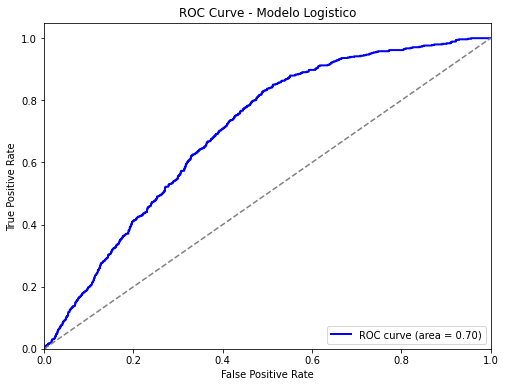

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

logit_model_red = LogisticRegression(max_iter=1000)
logit_model_red.fit(X_train_reducido, y_train)

y_pred_log_red = logit_model_red.predict(X_test_reducido)
y_prob_log_red = logit_model_red.predict_proba(X_test_reducido)[:, 1]

fpr_log_red, tpr_log_red, thresholds_log_red = roc_curve(y_test, y_prob_log_red)
auc_log_red = roc_auc_score(y_test, y_prob_log_red)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_red, tpr_log_red, color='blue'
         , lw=2, label='ROC curve (area = %0.2f)' % auc_log_red)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Modelo Logistico')
plt.legend(loc='lower right')
plt.show()

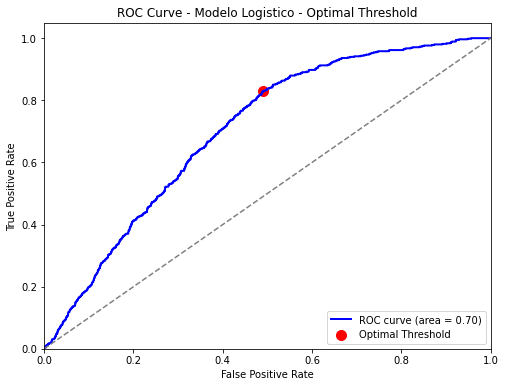

Optimal Threshold: 0.0359784470904985


In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_log_red = logit_model_red.predict_proba(X_test_reducido)[:, 1]

fpr_log_red, tpr_log_red, thresholds_log_red = roc_curve(y_test, y_prob_log_red)

auc_log_red = roc_auc_score(y_test, y_prob_log_red)

Youden_index_log_red = tpr_log_red - fpr_log_red
optimal_threshold_index_log_red = np.argmax(Youden_index_log_red)
optimal_threshold_log_red = thresholds_log[optimal_threshold_index_log_red]

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_red, tpr_log_red, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_log_red)
plt.scatter(fpr_log_red[optimal_threshold_index_log_red]
            , tpr_log_red[optimal_threshold_index_log_red]
            , color='red', s=100, label='Optimal Threshold')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Modelo Logistico - Optimal Threshold')
plt.legend(loc='lower right')
plt.show()

print("Optimal Threshold:", optimal_threshold_log_red)

In [58]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_optimal_threshold_log_red = (y_prob_log_red >= optimal_threshold_log_red).astype(int)

conf_matrix_log_red = confusion_matrix(y_test, y_pred_optimal_threshold_log_red)

print("Matriz de confusión:")
print(conf_matrix_log_red)

Matriz de confusión:
[[5211 6972]
 [  63  485]]


In [59]:
fn_index_row = 1  
fn_index_col = 0 
fn_count = conf_matrix_log_red[fn_index_row, fn_index_col]

print("Falsos Negativos (FN):", fn_count)

Falsos Negativos (FN): 63


In [60]:
y_prob_log_red = logit_model_red.predict_proba(X_test_reducido)[:, 1]
y_pred_log_red = (y_prob_log_red > 0.5).astype(int)
y_pred_optimal_threshold_log_red = (y_prob_log_red >= optimal_threshold_log_red).astype(int)

result_log_red = pd.DataFrame({'y_prob': y_prob_log_red,
                              'y_pred': y_pred_log_red,
                             'y_pred_OT' : y_pred_optimal_threshold_log_red
                             }, index=X_test_reducido.index)
result_log_red

,y_prob,y_pred,y_pred_OT
28168,0.014136,0,0
3277,0.059749,0,1
12950,0.074836,0,1
8363,0.051815,0,1
16286,0.086008,0,1
...,...,...,...
20398,0.012398,0,0
36257,0.001007,0,0
7924,0.053131,0,1
11342,0.051233,0,1


In [62]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc_red(y_real_log_red, y_proba_log_red):
    df_red = pd.DataFrame()
    df_red['real'] = y_real_log_red
    df_red['proba'] = y_proba_log_red
    class0 = df_red[df_red['real'] == 0]
    class1 = df_red[df_red['real'] == 1]
    ks_red = ks_2samp(class0['proba'], class1['proba'])
    roc_auc_red = roc_auc_score(df_red['real'], df_red['proba'])
    print(f"KS: {ks_red.statistic:.4f} (p-value: {ks_red.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc_red:.4f}")
    return ks_red.statistic, roc_auc_red

print("log_red model:")
ks_base_log_red, auc_base_log_red = evaluate_ks_and_roc_auc_red(y_test, y_prob_log_red)

log_red model:
KS: 0.3391 (p-value: 2.893e-54)
ROC AUC: 0.7020


In [63]:
results_df_log_red = pd.DataFrame({
    'Modelo': ['Logistico Reducido'],
    'KS': [ks_base_log_red],
    'ROC AUC': [auc_base_log_red]
})

results_df_log_red = results_df_log_red.round(3)
results_df_log_red

,Modelo,KS,ROC AUC
0,Logistico Reducido,0.339,0.702


# Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model_red = RandomForestClassifier()

rf_model_red.fit(X_train_reducido, y_train)

y_pred_rf_red = rf_model_red.predict(X_test_reducido)

accuracy = accuracy_score(y_test, y_pred_rf_red)


Accuracy: 0.9558557850915089


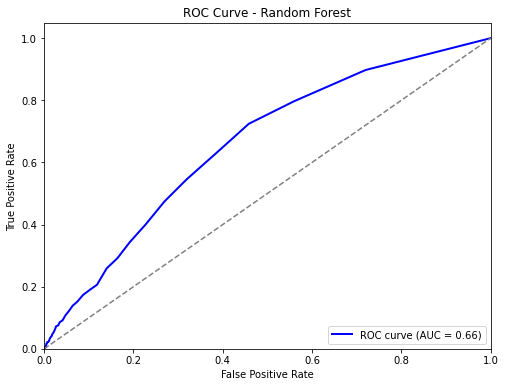

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_rf_red = rf_model_red.predict_proba(X_test_reducido)[:, 1]
fpr_rf_red, tpr_rf_red, thresholds_rf_red = roc_curve(y_test, y_prob_rf_red)
auc_rf_red = roc_auc_score(y_test, y_prob_rf_red)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_red, tpr_rf_red, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_rf_red)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

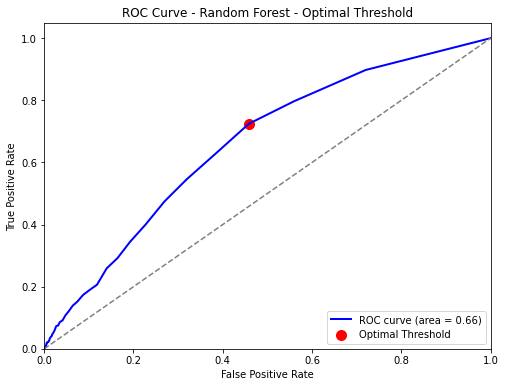

Optimal Threshold: 0.03


In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_rf_red = rf_model_red.predict_proba(X_test_reducido)[:, 1]

fpr_rf_red, tpr_rf_red, thresholds_rf_red = roc_curve(y_test, y_prob_rf_red)

auc_rf_red = roc_auc_score(y_test, y_prob_rf_red)

Youden_index_rf_red = tpr_rf_red - fpr_rf_red
optimal_threshold_index_rf_red = np.argmax(Youden_index_rf_red)
optimal_threshold_rf_red = thresholds_rf_red[optimal_threshold_index_rf_red]

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_red, tpr_rf_red, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_rf_red)
plt.scatter(fpr_rf_red[optimal_threshold_index_rf_red], tpr_rf_red[optimal_threshold_index_rf_red], color='red', s=100
            , label='Optimal Threshold')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest - Optimal Threshold')
plt.legend(loc='lower right')
plt.show()

print("Optimal Threshold:", optimal_threshold_rf_red)

In [67]:
from sklearn.metrics import confusion_matrix

y_prob_rf_red = rf_model_red.predict_proba(X_test_reducido)[:, 1]

y_pred_optimal_rf_red = (y_prob_rf >= optimal_threshold_rf_red).astype(int)

conf_matrix_rf_red = confusion_matrix(y_test, y_pred_optimal_rf_red)

print("Matriz de Confusión:")
print(conf_matrix_rf_red)

Matriz de Confusión:
[[6008 6175]
 [ 105  443]]


In [68]:
y_prob_rf_red = rf_model_red.predict_proba(X_test_reducido)[:, 1]
y_pred_rf_red = rf_model_red.predict(X_test_reducido)
y_pred_optimal_rf_red = (y_prob_rf_red >= optimal_threshold_rf_red).astype(int)


result_df_red = pd.DataFrame({'y_prob': y_prob_rf_red, 'y_pred': y_pred_rf_red, 'y_pred_OT':y_pred_optimal_rf_red }, index=X_test.index)
result_df_red


,y_prob,y_pred,y_pred_OT
28168,0.00,0,0
3277,0.25,0,1
12950,0.18,0,1
8363,0.11,0,1
16286,0.22,0,1
...,...,...,...
20398,0.00,0,0
36257,0.03,0,1
7924,0.06,0,1
11342,0.03,0,1


In [70]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc(y_real_rf_red, y_proba_rf_red):
    df = pd.DataFrame()
    df['real'] = y_real_rf_red
    df['proba'] = y_proba_rf_red
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'], df['proba'])
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

print("RF model:")
ks_rf_red, auc_rf_red = evaluate_ks_and_roc_auc(y_test, y_prob_rf_red)

RF model:
KS: 0.2660 (p-value: 3.158e-33)
ROC AUC: 0.6587


In [71]:
results_df_rf_red = pd.DataFrame({
    'Modelo': ['Random Forest Reducido'],
    'KS': [ks_rf_red],
    'ROC AUC': [auc_rf_red]
})

results_resumen_red = pd.concat([results_df_log_red, results_df_rf_red], ignore_index=True)
results_resumen_red = results_resumen_red.round(3)
results_resumen_red

,Modelo,KS,ROC AUC
0,Logistico Reducido,0.339,0.702
1,Random Forest Reducido,0.266,0.659


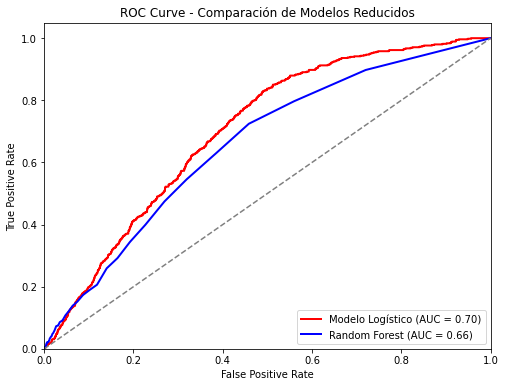

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC - Modelo Logístico (SFS)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_red, tpr_log_red, color='red', lw=2
         , label='Modelo Logístico (AUC = %0.2f)' % auc_log_red)

# Curva ROC - Random Forest
plt.plot(fpr_rf_red, tpr_rf_red, color='blue', lw=2
         , label='Random Forest (AUC = %0.2f)' % auc_rf_red)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Comparación de Modelos Reducidos')
plt.legend(loc='lower right')
plt.show()

# XG BOOST

In [73]:
import xgboost as xgb
from sklearn.metrics import classification_report

xgb_model_red = xgb.XGBClassifier()

xgb_model_red.fit(X_train_reducido, y_train)

y_pred_xgb_red = xgb_model_red.predict(X_test_reducido)

accuracy = accuracy_score(y_test, y_pred_xgb_red)


Accuracy: 0.9562485272170294


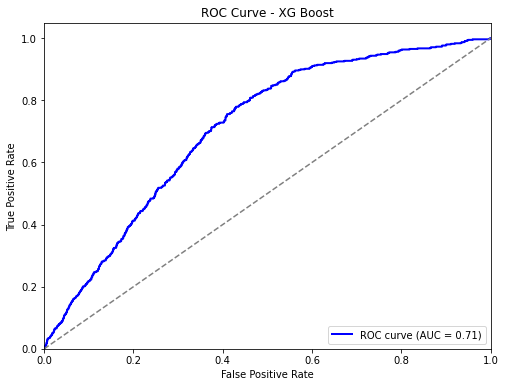

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_xgb_red = xgb_model_red.predict_proba(X_test_reducido)[:, 1]

fpr_xgb_red, tpr_xgb_red, thresholds_xgb_red = roc_curve(y_test, y_prob_xgb_red)

auc_xgb_red = roc_auc_score(y_test, y_prob_xgb_red)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_red, tpr_xgb_red, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_xgb_red)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XG Boost')
plt.legend(loc='lower right')
plt.show()

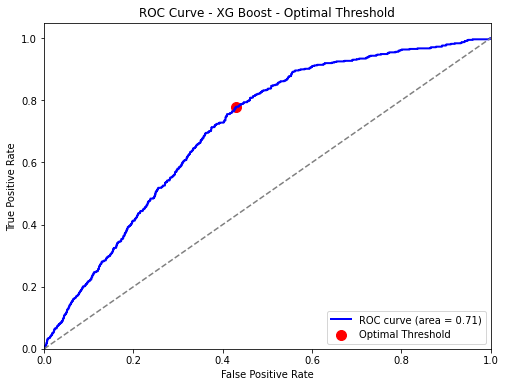

Optimal Threshold: 0.022433236


In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_xgb_red = xgb_model_red.predict_proba(X_test_reducido)[:, 1]

fpr_xgb_red, tpr_xgb_red, thresholds_xgb_red = roc_curve(y_test, y_prob_xgb_red)

auc_xgb_red = roc_auc_score(y_test, y_prob_xgb_red)

Youden_index_xgb_red = tpr_xgb_red - fpr_xgb_red
optimal_threshold_index_xgb_red = np.argmax(Youden_index_xgb_red)
optimal_threshold_xgb_red = thresholds_xgb_red[optimal_threshold_index_xgb_red]

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_red, tpr_xgb_red, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_xgb_red)
plt.scatter(fpr_xgb_red[optimal_threshold_index_xgb_red], tpr_xgb_red[optimal_threshold_index_xgb_red], color='red', s=100, label='Optimal Threshold')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XG Boost - Optimal Threshold')
plt.legend(loc='lower right')
plt.show()

print("Optimal Threshold:", optimal_threshold_xgb_red)

In [76]:
from sklearn.metrics import confusion_matrix

y_prob_xgb_red = xgb_model_red.predict_proba(X_test_reducido)[:, 1]

y_pred_optimal_xgb_red = (y_prob_xgb_red >= optimal_threshold_xgb_red).astype(int)

conf_matrix_xgb_red = confusion_matrix(y_test, y_pred_optimal_xgb_red)

print("Matriz de Confusión:")
print(conf_matrix_xgb_red)

Matriz de Confusión:
[[6951 5232]
 [ 121  427]]


In [77]:
y_prob_xgb_red = xgb_model_red.predict_proba(X_test_reducido)[:, 1]
y_pred_xgb_red = xgb_model_red.predict(X_test_reducido)
y_pred_optimal_xgb_red = (y_prob_xgb_red >= optimal_threshold_xgb_red).astype(int)


result_df_red = pd.DataFrame({'y_prob': y_prob_xgb_red
                              , 'y_pred': y_pred_xgb_red
                              , 'y_pred_OT':y_pred_optimal_xgb_red }
                             , index=X_test.index)
result_df_red

,y_prob,y_pred,y_pred_OT
28168,0.002201,0,0
3277,0.033443,0,1
12950,0.058926,0,1
8363,0.068526,0,1
16286,0.071934,0,1
...,...,...,...
20398,0.000225,0,0
36257,0.001989,0,0
7924,0.063030,0,1
11342,0.018446,0,0


In [79]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc(y_real_xgb_red, y_proba_xgb_red):
    df = pd.DataFrame()
    df['real'] = y_real_xgb_red
    df['proba'] = y_proba_xgb_red
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'], df['proba'])
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

print("xgb_red model:")
ks_xgb_red, auc_xgb_red = evaluate_ks_and_roc_auc(y_test, y_prob_xgb_red)

xgb_red model:
KS: 0.3497 (p-value: 8.431e-58)
ROC AUC: 0.7085


In [80]:
results_df_xgb_red = pd.DataFrame({
    'Modelo': ['XGBoost Reducido'],
    'KS': [ks_xgb_red],
    'ROC AUC': [auc_xgb_red]
})

results_resumen_red = pd.concat([results_df_log_red, results_df_rf_red,results_df_xgb_red ], ignore_index=True)
results_resumen_red = results_resumen_red.round(3)
results_resumen_red

,Modelo,KS,ROC AUC
0,Logistico Reducido,0.339,0.702
1,Random Forest Reducido,0.266,0.659
2,XGBoost Reducido,0.350,0.708


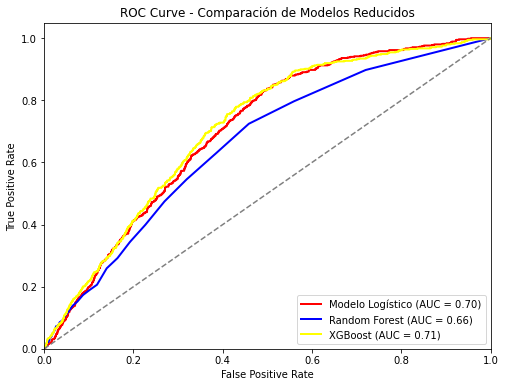

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC - Modelo Logístico (SFS)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_red, tpr_log_red, color='red'
         , lw=2, label='Modelo Logístico (AUC = %0.2f)' % auc_log_red)

# Curva ROC - Random Forest
plt.plot(fpr_rf_red, tpr_rf_red, color='blue'
         , lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf_red)

#Curva ROC - XGBoost
plt.plot(fpr_xgb_red, tpr_xgb_red, color='yellow'
         , lw=2, label='XGBoost (AUC = %0.2f)' % auc_xgb_red)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Comparación de Modelos Reducidos')
plt.legend(loc='lower right')
plt.show()

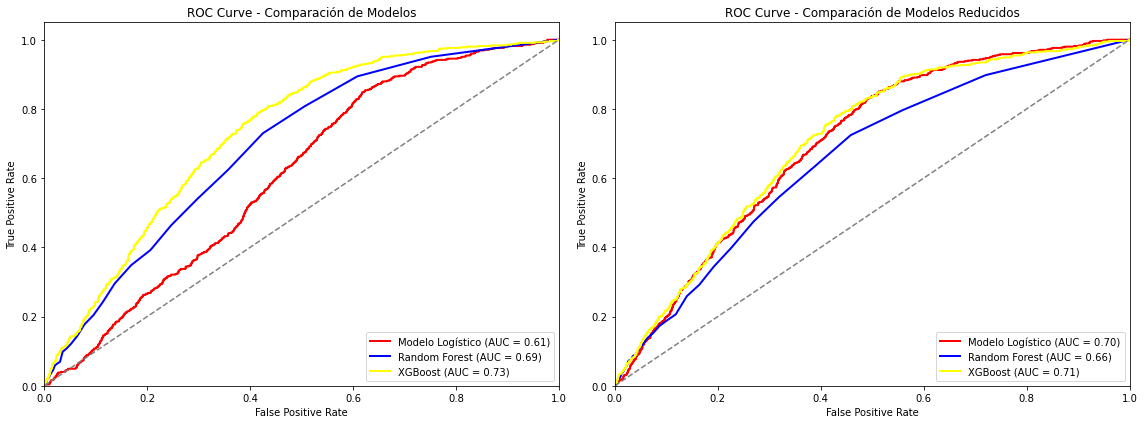

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Crear una figura con dos subgráficos uno al lado del otro
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Primer gráfico - Modelos completos
ax[0].plot(fpr_log, tpr_log, color='red', lw=2, label='Modelo Logístico (AUC = %0.2f)' % auc_log)
ax[0].plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)
ax[0].plot(fpr_xgb, tpr_xgb, color='yellow', lw=2, label='XGBoost (AUC = %0.2f)' % auc_xgb)
ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve - Comparación de Modelos')
ax[0].legend(loc='lower right')

# Segundo gráfico - Modelos reducidos (SFS)
ax[1].plot(fpr_log_red, tpr_log_red, color='red', lw=2, label='Modelo Logístico (AUC = %0.2f)' % auc_log_red)
ax[1].plot(fpr_rf_red, tpr_rf_red, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf_red)
ax[1].plot(fpr_xgb_red, tpr_xgb_red, color='yellow', lw=2, label='XGBoost (AUC = %0.2f)' % auc_xgb_red)
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve - Comparación de Modelos Reducidos')
ax[1].legend(loc='lower right')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [83]:
tabla_resumen = pd.concat([results_resumen , results_resumen_red ], ignore_index=True)
tabla_resumen = tabla_resumen.round(3)
tabla_resumen

,Modelo,KS,ROC AUC
0,Logistico,0.231,0.609
1,Random Forest,0.305,0.692
2,XGBoost,0.373,0.731
3,Logistico Reducido,0.339,0.702
4,Random Forest Reducido,0.266,0.659
5,XGBoost Reducido,0.350,0.708


In [84]:
# optimizacion del punto de corte

In [85]:
Youden_index_xgb_red = tpr_xgb_red - fpr_xgb_red
optimal_threshold_index_xgb_red = np.argmax(Youden_index_xgb_red)
optimal_threshold_xgb_red = thresholds_xgb_red[optimal_threshold_index_xgb_red]

print("Optimal Threshold:", optimal_threshold_xgb_red)

Optimal Threshold: 0.022433236


In [86]:
y_pred_optimal_xgb_red = (y_prob_xgb_red >= optimal_threshold_xgb_red).astype(int)
y_pred_optimal_xgb_red

array([0, 1, 1, ..., 1, 0, 0])

In [87]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc(y_real_xgb_red, y_proba_xgb_red, y_pred_optimal_xgb_red):
    df = pd.DataFrame()
    df['real'] = y_real_xgb_red
    df['proba'] = y_proba_xgb_red
    df['pred_optimal'] = y_pred_optimal_xgb_red
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    # KS usando las probabilidades ajustadas al punto de corte óptimo
    ks = ks_2samp(class0['pred_optimal'], class1['pred_optimal'])
    # AUC no depende del punto de corte, lo puedes calcular con las probabilidades
    roc_auc = roc_auc_score(df['real'], df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    return ks.statistic, roc_auc

print("xgb_red model optimizando punto de corte:")
ks_xgb_red, auc_xgb_red = evaluate_ks_and_roc_auc(y_test, y_prob_xgb_red, y_pred_optimal_xgb_red)


xgb_red model optimizando punto de corte:
KS: 0.3497 (p-value: 8.431e-58)
ROC AUC: 0.7085


In [88]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Probabilidades para calcular el AUC
auc_xgb_opt = roc_auc_score(y_test, y_prob_xgb_red)  

# Predicciones ajustadas al punto de corte óptimo para las demás métricas
precision_xgb_opt = precision_score(y_test, y_pred_optimal_xgb_red)
recall_xgb_opt = recall_score(y_test, y_pred_optimal_xgb_red)
f1_xgb_opt = f1_score(y_test, y_pred_optimal_xgb_red)
accuracy_xgb_opt = accuracy_score(y_test, y_pred_optimal_xgb_red)

# Crear un DataFrame con los resultados de las métricas
summary_stats = {
    'Métrica': ['AUC', 'Precisión', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [auc_xgb_opt, precision_xgb_opt, recall_xgb_opt, f1_xgb_opt, accuracy_xgb_opt]
}

summary_df = pd.DataFrame(summary_stats)
summary_df


,Métrica,Valor
0,AUC,0.708487
1,Precisión,0.075455
2,Recall,0.779197
3,F1-Score,0.137587
4,Accuracy,0.579530


In [89]:
metrics_xgb_red_calib = {
    'AUC': [auc_xgb_opt],
    'Precision': [precision_xgb_opt],
    'Recall': [recall_xgb_opt],
    'F1-score': [f1_xgb_opt],
    'Accuracy': [accuracy_xgb_opt]
}

metrics_df_xgb_red_calib = pd.DataFrame(metrics_xgb_red_calib)
metrics_df_xgb_red_calib = metrics_df_xgb_red_calib.round(3)
metrics_df_xgb_red_calib


,AUC,Precision,Recall,F1-score,Accuracy
0,0.708,0.075,0.779,0.138,0.58


In [90]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from scipy.stats import ks_2samp
import numpy as np

xgb_model_red = xgb.XGBClassifier()
xgb_model_red.fit(X_train_reducido, y_train)

y_prob_xgb_red = xgb_model_red.predict_proba(X_test_reducido)[:, 1]

# punto de corte arbitrario (0.5)
y_pred_arbitrario_xgb_red = (y_prob_xgb_red >= 0.5).astype(int)
y_pred_arbitrario_xgb_red = xgb_model_red.predict(X_test_reducido).astype(int)

auc_xgb_red = roc_auc_score(y_test, y_prob_xgb_red)

def calculate_ks(y_real, y_pred):
    class0 = y_pred[y_real == 0]
    class1 = y_pred[y_real == 1]
    ks = ks_2samp(class0, class1).statistic
    return ks

ks_arbitrario = calculate_ks(y_test, y_prob_xgb_red)


precision_arbitrario = precision_score(y_test, y_pred_arbitrario_xgb_red)
recall_arbitrario = recall_score(y_test, y_pred_arbitrario_xgb_red)
f1_arbitrario = f1_score(y_test, y_pred_arbitrario_xgb_red)
accuracy_arbitrario = accuracy_score(y_test, y_pred_arbitrario_xgb_red)

#punto de corte óptimo
fpr_xgb_red, tpr_xgb_red, thresholds_xgb_red = roc_curve(y_test, y_prob_xgb_red)
youden_index_xgb_red = tpr_xgb_red - fpr_xgb_red
optimal_threshold_index_xgb_red = np.argmax(youden_index_xgb_red)
optimal_threshold_xgb_red = thresholds_xgb_red[optimal_threshold_index_xgb_red]

y_pred_optimal_xgb_red = (y_prob_xgb_red >= optimal_threshold_xgb_red).astype(int)

ks_optimal = calculate_ks(y_test, y_pred_optimal_xgb_red)

precision_optimal = precision_score(y_test, y_pred_optimal_xgb_red)
recall_optimal = recall_score(y_test, y_pred_optimal_xgb_red)
f1_optimal = f1_score(y_test, y_pred_optimal_xgb_red)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal_xgb_red)

metrics_comparison = pd.DataFrame({
    'Métrica': ['AUC', 'Precisión', 'Recall', 'F1-Score', 'Accuracy', 'KS'],
    'Corte Arbitrario (0.5)': [auc_xgb_red, precision_arbitrario, recall_arbitrario, f1_arbitrario, accuracy_arbitrario, ks_arbitrario],
    'Corte Óptimo': [auc_xgb_red, precision_optimal, recall_optimal, f1_optimal, accuracy_optimal, ks_optimal]
})

metrics_comparison

,Métrica,Corte Arbitrario (0.5),Corte Óptimo
0,AUC,0.708487,0.708487
1,Precisión,0.000000,0.075455
2,Recall,0.000000,0.779197
3,F1-Score,0.000000,0.137587
4,Accuracy,0.956249,0.579530
5,KS,0.349746,0.349746


In [91]:
optimal_threshold_xgb_red

0.022433236

In [92]:
feature_importance = xgb_model_red.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Importance'])
importance_df.index.name = 'Feature'
importance_df.reset_index(inplace=True)

categorical_features = {
    'Canal_ingreso': [
        'Canal_ingreso_Call Center', 
        'Canal_ingreso_Red', 
        'Canal_ingreso_Venta Digital'
    ],
    'departamento': [
        'departamento_Artigas',
        'departamento_Canelones',
        'departamento_Cerro Largo',
        'departamento_Colonia',
        'departamento_Durazno',
        'departamento_Flores',
        'departamento_Florida',
        'departamento_Lavalleja',
        'departamento_Maldonado',
        'departamento_Montevideo',
        'departamento_Paysandú',
        'departamento_Rivera',
        'departamento_Rocha',
        'departamento_Río Negro',
        'departamento_Salto',
        'departamento_San José',
        'departamento_Soriano',
        'departamento_Tacuarembó',
        'departamento_Treinta y Tres'
    ],
    'sexo': [
        'sexo_F',
        'sexo_M'
    ],
    'vuelta_clases': [
        'vuelta_clases_no',
        'vuelta_clases_si'
    ]
}

def map_original_variable(feature_name):
    for original_var, one_hot_columns in categorical_features.items():
        if feature_name in one_hot_columns:
            return original_var
    return feature_name

importance_df['Variable Original'] = importance_df['Feature'].apply(map_original_variable)

grouped_importance = importance_df.groupby('Variable Original')['Importance'].sum().reset_index()

final_importance_df = grouped_importance.sort_values(by='Importance', ascending=False)
final_importance_df

,Variable Original,Importance
15,recencia_CompraNormal,6.898606
9,frecuencia_CompraNormal,5.363791
14,recencia,2.821995
0,Cant_Trx_Mes,2.726672
11,monetario,2.447959
6,Monto_Trx_Promedio,2.360185
1,Cant_Trx_Normal_Mes,2.354630
2,LimiteCredito,2.320813
3,Monto_Trx_Mes,2.316791
10,log_ingresos,2.276678


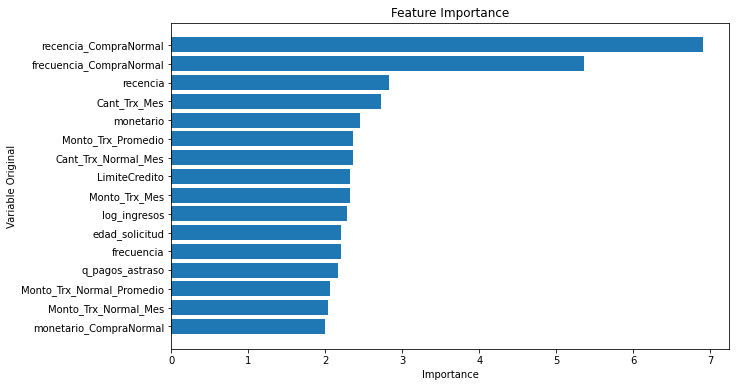

In [93]:
plt.figure(figsize=(10, 6))
plt.barh(final_importance_df['Variable Original'], final_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable Original')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()